In [1]:
import pandas as pd
from datetime import datetime
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np

today = str(datetime.today().strftime('%Y-%m-%d'))
df = pd.read_csv("../datasets/obito_cartorio.csv")
df = df.filter(["date", "state", "deaths_covid19", "new_deaths_covid19"]).fillna(0)
df = df.sort_values(by=['date'])
df = df.loc[(df['date'] >= '2020-03-15') & (df['date'] <= today)]

In [2]:
def unique(list1): 
    unique_list = dict()
    for x in list1: 
        unique_list[x] = x
    return sorted(list(unique_list.keys()))
state_list = unique(list(np.array(df["state"])))
print("state_list: ", len(state_list), state_list)

state_list:  27 ['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO']


In [3]:
states = dict()
states_norm = dict()
for state in state_list:
    states[state] = np.array(df.loc[df['state'] == state]["new_deaths_covid19"])
    max_val = max(states[state])
    states_norm[state] = states[state] / max_val   

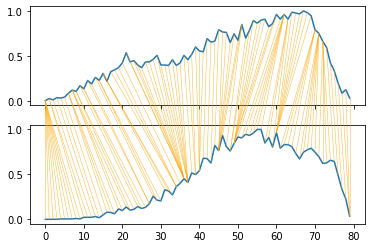

In [4]:
A = 'SP'
B = 'RJ'
path = dtw.warping_path(states_norm[A], states_norm[B])
dtwvis.plot_warping(s1=states_norm[A], s2=states_norm[B], path=path);

In [5]:
for A in state_list:
    for B in state_list:
        if A == B:
            continue
        path = dtw.warping_path(states_norm[A], states_norm[B])
        dtwvis.plot_warping(s1=states_norm[A], s2=states_norm[B], path=path, filename="ESTADOS/{}_{}.jpg".format(A,B))